In [20]:
import pandas as pd
import matplotlib
import seaborn as sns
import cufflinks as cf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

#### Data loading

In [21]:
def load_data(filename):
    try:
        return pd.read_csv(filename)
    except FileNotFoundError:
        print("File not found file ", filename)
    except PermissionError:
        print("No permission to access file ", filename)
    except Exception as e:
        print("Some generic exception with file ", filename , " error --> ", e)

def ohe_encoder_train(X):
    to_be_encoded_df = X[["SEX","EDUCATION","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]]
    ohe_encoder = OneHotEncoder(drop='first', dtype=np.int64, sparse_output=False)
    encoded = ohe_encoder.fit_transform(to_be_encoded_df)
    ohe_df = pd.DataFrame(encoded, columns=ohe_encoder.get_feature_names_out())
    encoded_df = pd.concat([X[["LIMIT_BAL","AGE"]].reset_index(drop=True),ohe_df.reset_index(drop=True), X.iloc[0:, -12:].reset_index(drop=True)], axis=1)
    return encoded_df

def ohe_encoder_test(X):
    to_be_encoded_df = X[["SEX","EDUCATION","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]]
    encoded = ohe_encoder.transform(to_be_encoded_df)
    ohe_df = pd.DataFrame(encoded, columns=ohe_encoder.get_feature_names_out())
    encoded_df = pd.concat([X[["LIMIT_BAL","AGE"]].reset_index(drop=True),ohe_df.reset_index(drop=True), X.iloc[0:, -12:].reset_index(drop=True)], axis=1)
    return encoded_df


cf.go_offline()
filename = r'C:\Users\abhin\Downloads\UCI_Credit_Card.csv'
data = load_data(filename)
pd.pandas.set_option('display.max_columns',None)
data.head(5)

# No Null or missing Values in DataSet

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#### Null values check

In [73]:
data.isna().values.any()

np.False_

#### Validating values

In [74]:
# The ID column doesn't have any relevance here and each value is unique.
print(data.ID.nunique())
print(data.shape)

30000
(30000, 25)


In [75]:
# LIMIT_BAL has values ranging between 10,000 and 100,000.
print(data.LIMIT_BAL.min(),data.LIMIT_BAL.max())

10000.0 1000000.0


In [76]:
# SEX has only valid values in it
data.SEX.value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [77]:
# EDUCATION has 14 invalid values
data.EDUCATION.value_counts().sort_index()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: count, dtype: int64

In [78]:
# Marriage has 54 invalid values
data.MARRIAGE.value_counts().sort_index()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: count, dtype: int64

21 79 35.4855


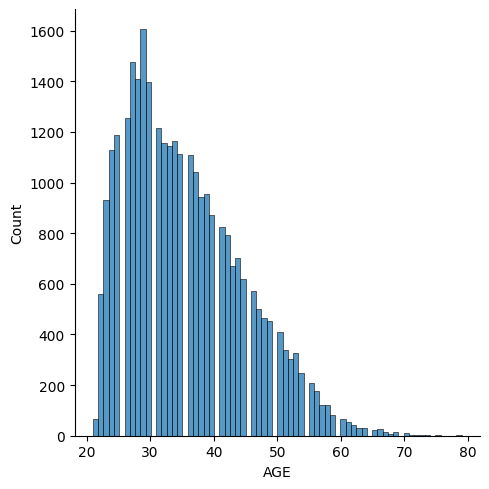

In [79]:
# AGE has
sns.displot(data.AGE)
print(data.AGE.min(), data.AGE.max(), data.AGE.mean())

In [80]:
# 5-number summary of AGE
age_stats = data.AGE.describe()
print(age_stats['min'])
print(age_stats['25%'])
print(age_stats['50%'])
print(age_stats['75%'])
print(age_stats['max'])

21.0
28.0
34.0
41.0
79.0


In [81]:
data.PAY_0.value_counts().sort_index()

PAY_0
-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: count, dtype: int64

In [82]:
# Dataset is imbalanced
data.default.value_counts()

default
0    23364
1     6636
Name: count, dtype: int64

#### Spilt the dataset

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[0:-1,1:-1],data.iloc[0:-1,-1:], train_size=0.60, random_state=12)

#### Encoder functions

#### Model Building

In [139]:
model = LogisticRegression(max_iter=20000, random_state=0, class_weight={0:1,1:3})
model.fit(X_train_encoded, Y_train)

c:\Users\abhin\OneDrive\Desktop\Credit Card Default Prediction\.venv\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\abhin\OneDrive\Desktop\Credit Card Default Prediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning:

lbfgs failed to converge after 13238 iteration(s) (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*","{0: 1, 1: 3}"
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",0
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :te

#### Prediction

In [ ]:

y_pred = model.predict(X_test_encoded)
y_probs = model.predict_proba(X_test_encoded)[:,1]

roc_auc = roc_auc_score(Y_test, y_probs)
print(f1_score(Y_test, y_pred))
print(roc_auc)

0.525300327630142
0.7606816087090053


#### Performance Metrics

In [ ]:
print(roc_auc_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print("Testing score ", accuracy_score(Y_test, y_pred))
print("Training score", model.score(X_train_encoded, Y_train))

0.6941663259512003
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      9292
           1       0.52      0.53      0.53      2708

    accuracy                           0.78     12000
   macro avg       0.69      0.69      0.69     12000
weighted avg       0.78      0.78      0.78     12000

[[7949 1343]
 [1265 1443]]
Testing score  0.7826666666666666
Training score 0.7839324406911495


In [29]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[("encoder",OneHotEncoder(drop='first',dtype=np.int64, sparse_output=False)),
                ("model",LogisticRegression(max_iter=20000, random_state=0, class_weight={0:1,1:3}))])

#### Resampling Dataset

#### 1. Make list of dependencies with version for requirements.txt and include them in the file
#### 2. Add exception handling on operations that may cause exceptions
#### 3. Add logging
#### 4. Create app.py having code in it

In [30]:
categorical_features = ["SEX","EDUCATION","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]

pipeline.fit(X_train[categorical_features],Y_train)

y_pred = pipeline.predict(X_test[categorical_features])

c:\Users\abhin\OneDrive\Desktop\Credit Card Default Prediction\.venv\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



#### Performance Metrics

In [31]:
print(roc_auc_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print("Testing score ", accuracy_score(Y_test, y_pred))
print("Training score", pipeline.score(X_train[categorical_features], Y_train))

0.698352993092643
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      9292
           1       0.54      0.53      0.53      2708

    accuracy                           0.79     12000
   macro avg       0.70      0.70      0.70     12000
weighted avg       0.79      0.79      0.79     12000

[[8092 1200]
 [1284 1424]]
Testing score  0.793
Training score 0.7970998388799377


In [35]:
import joblib
model_pipeline = joblib.load("credit_risk_pipeline.pkl")

In [38]:
pd.DataFrame(model_pipeline.predict(X_test.iloc[:5]))

,0
0,1
1,1
2,0
3,0
4,0
